In [11]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import cv2
import math
import pickle
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from more_itertools import powerset
import wandb
label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='mean')
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [12]:
df = pd.read_csv('./WineQT.csv')
statistics = df.describe()
print(statistics)

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1143.000000       1143.000000  1143.000000     1143.000000  \
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1143.000000          1143.000000           1143.000000  1143.000000  \
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [13]:
data_standardized = df

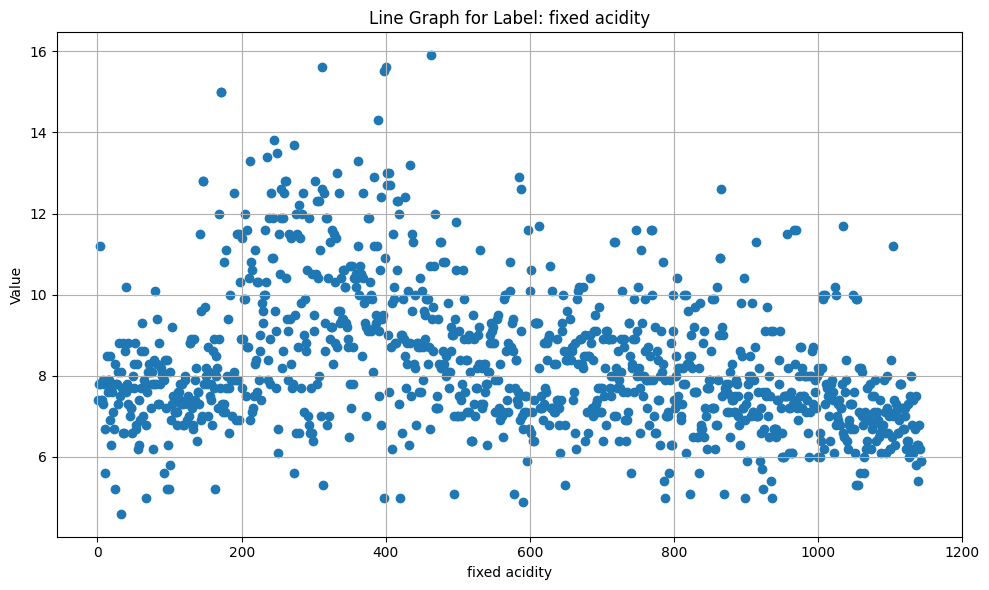

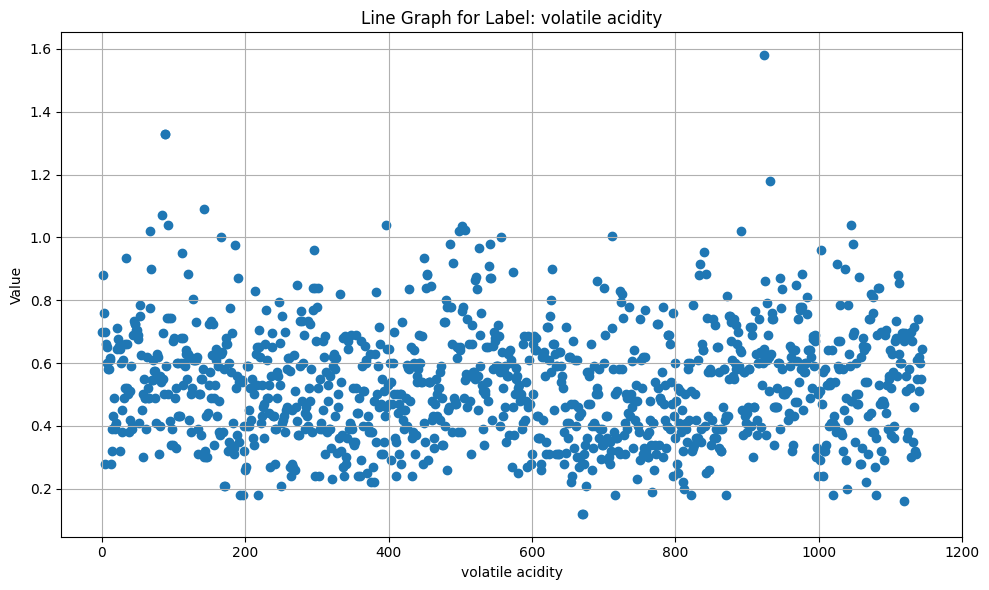

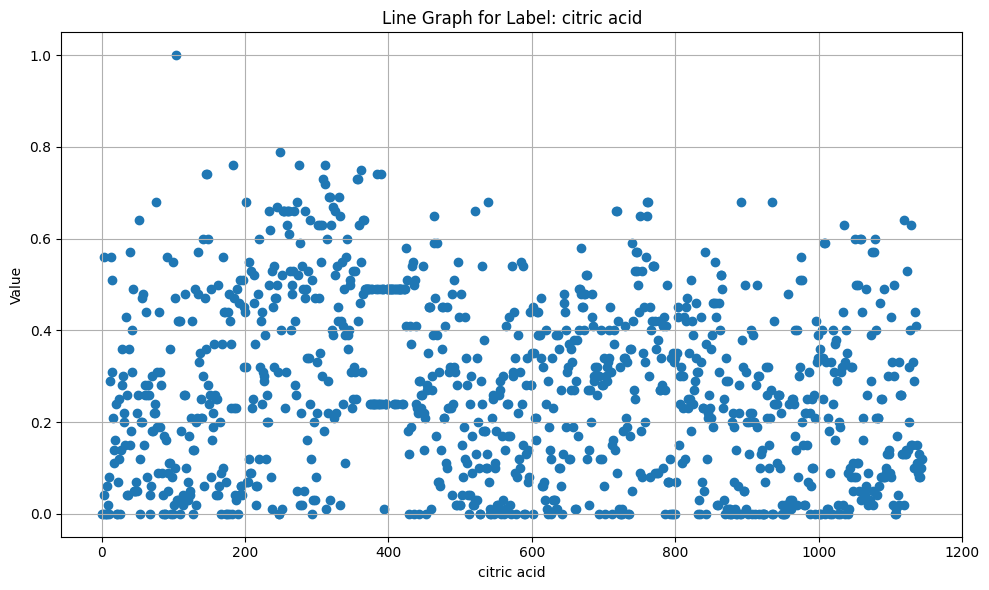

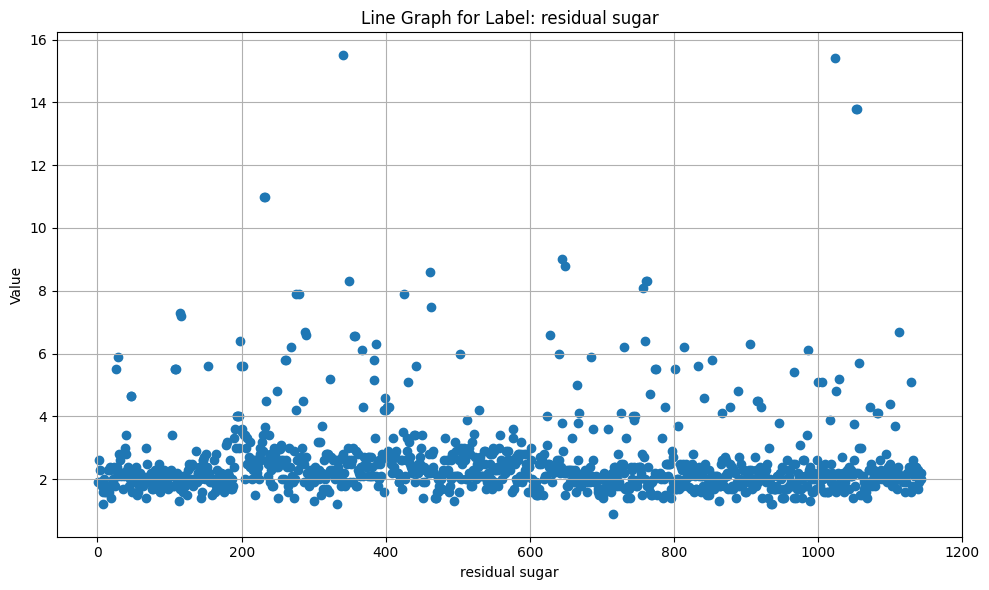

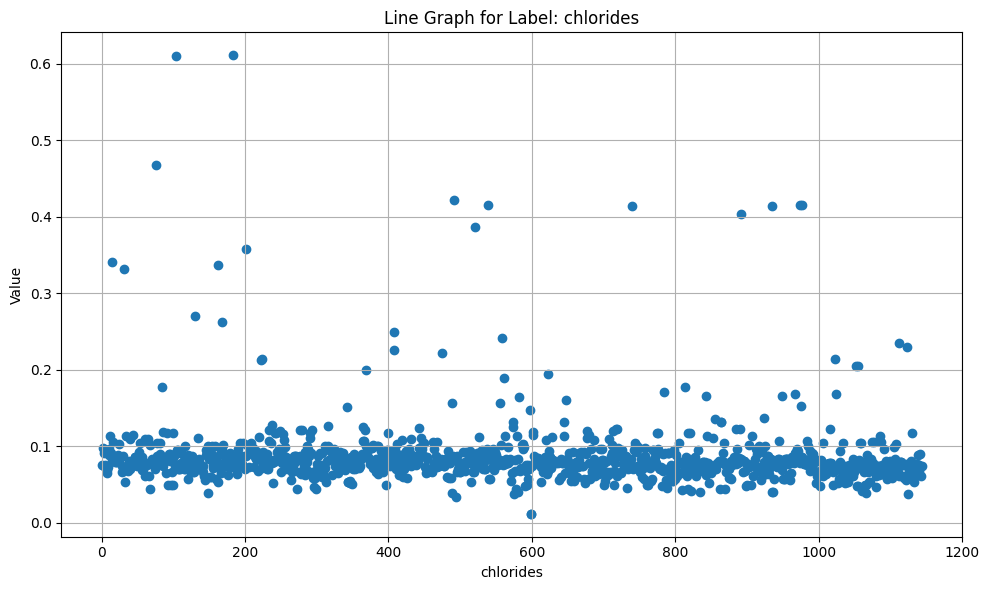

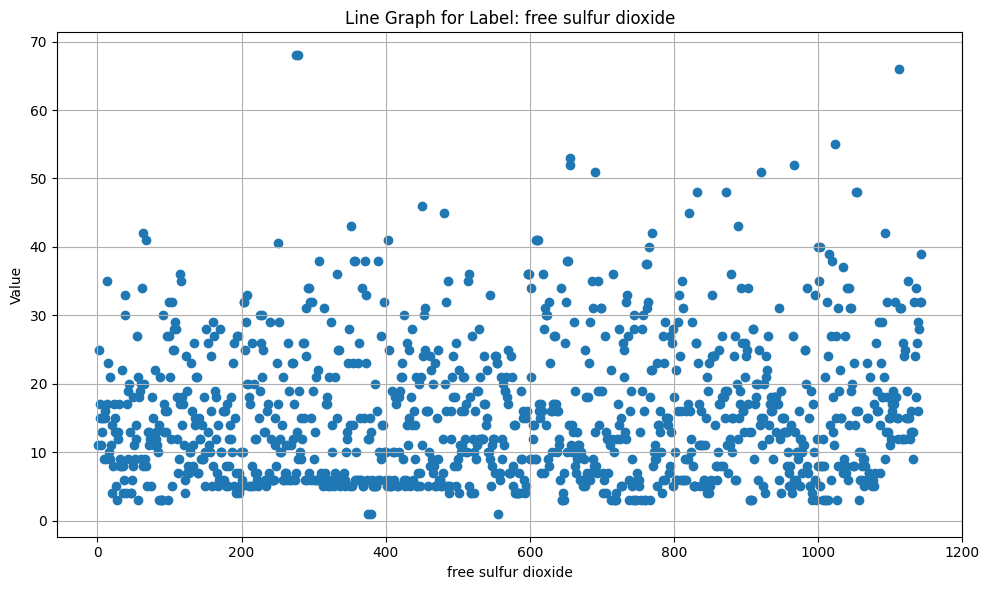

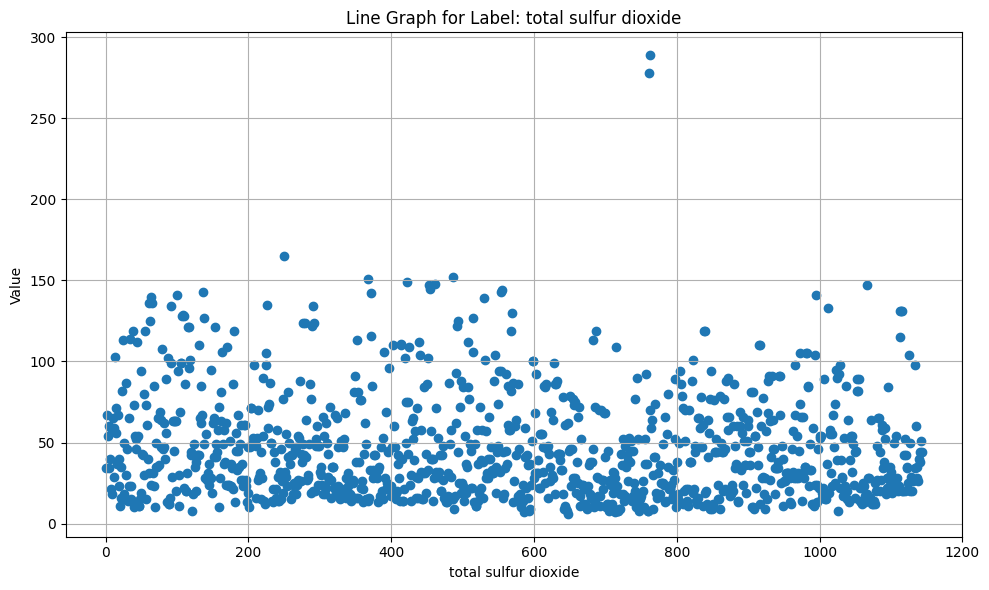

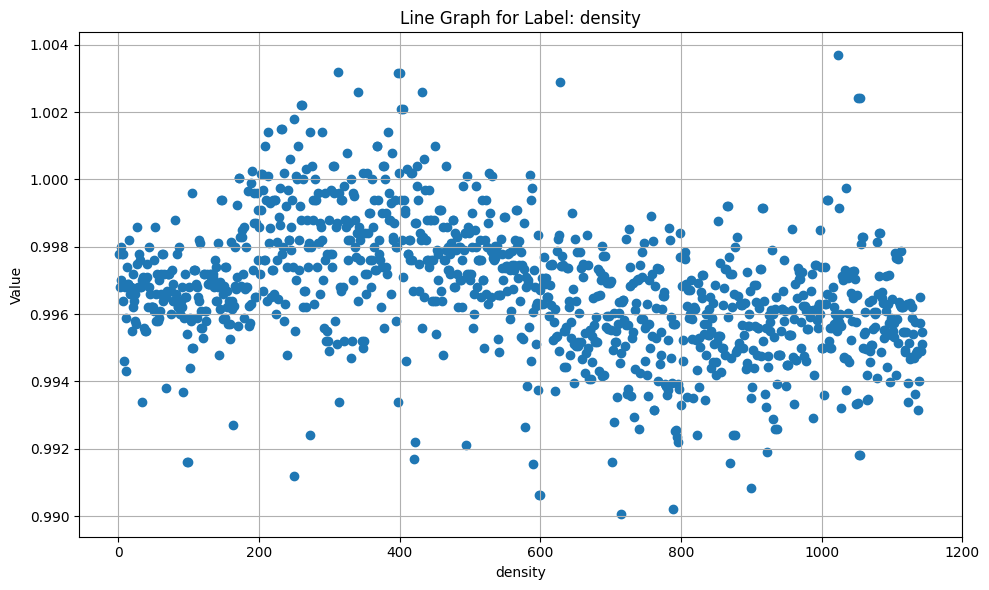

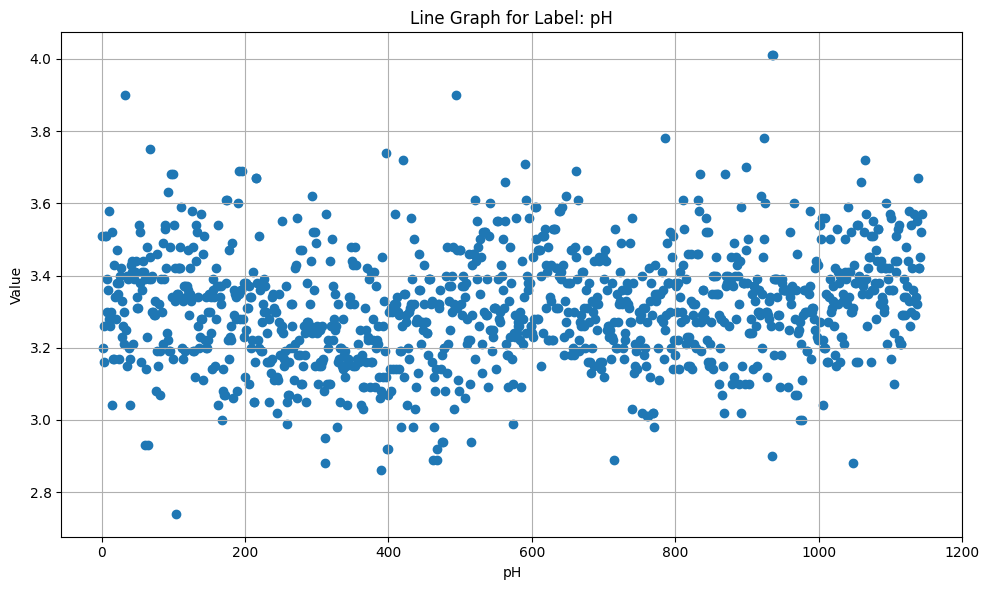

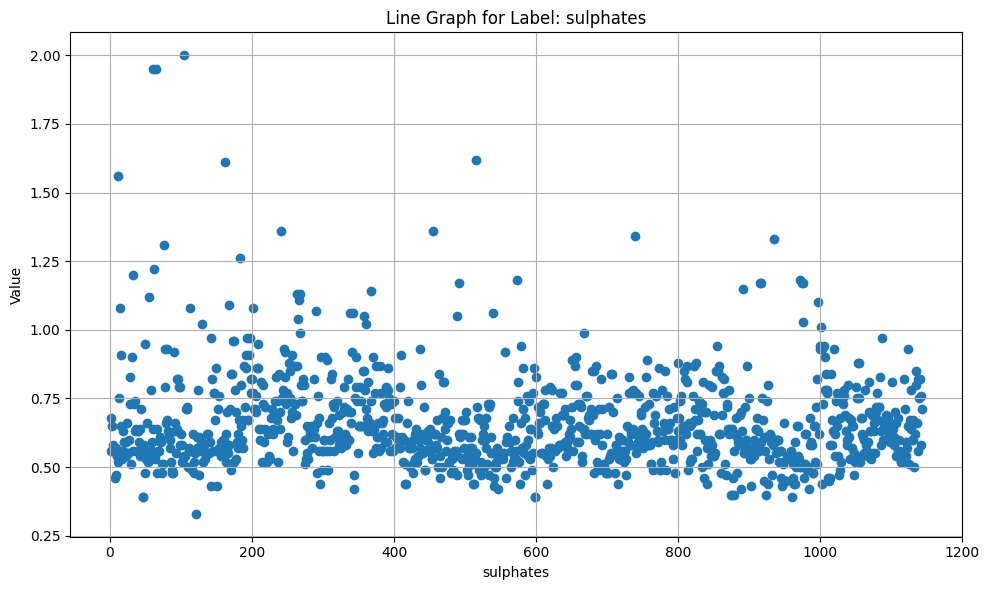

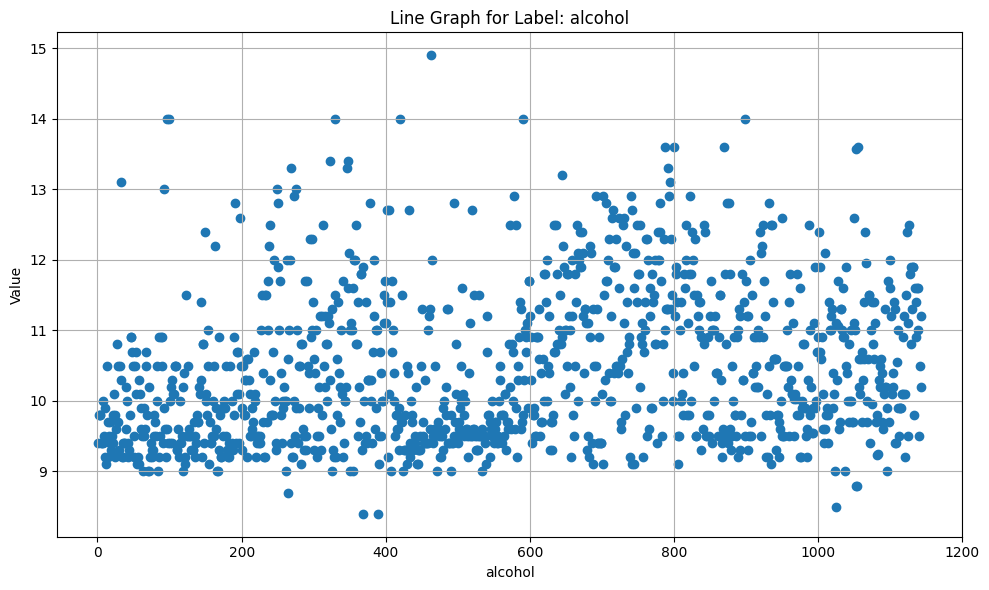

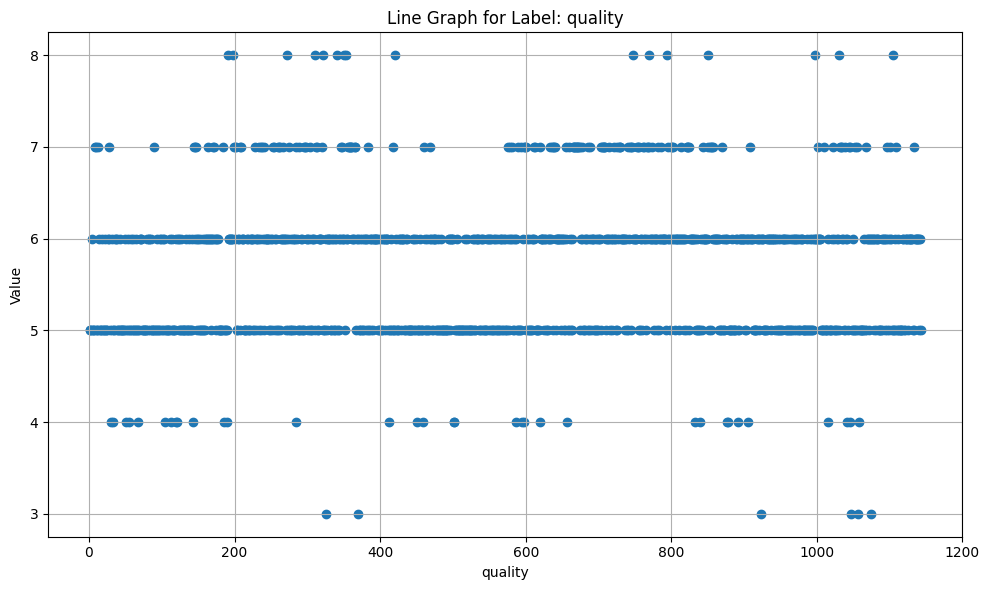

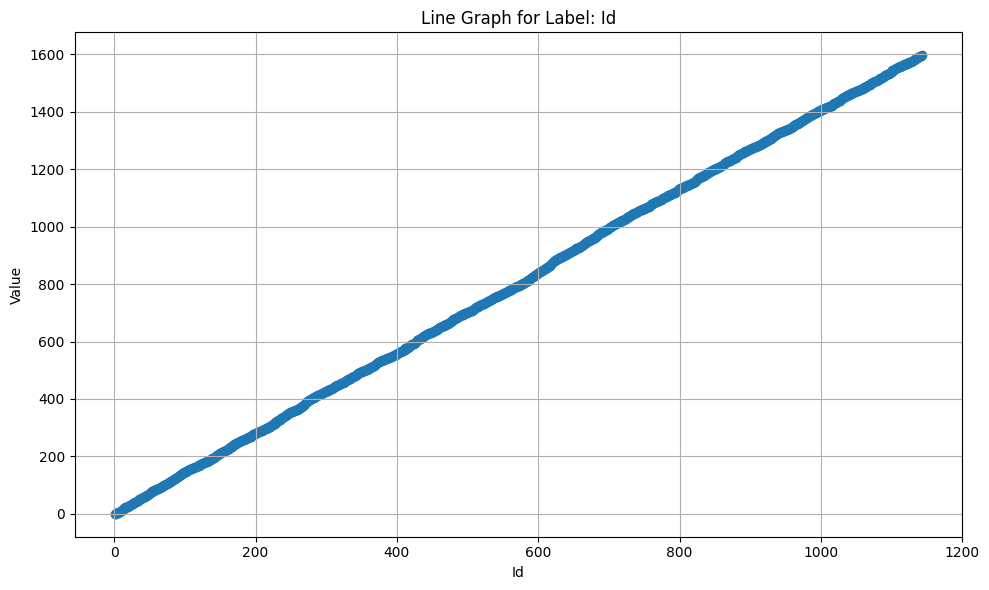

In [14]:
for label_name in df.columns:
    label_data = df[label_name]
    arr = list(range(1, len(label_data) + 1))
    plt.figure(figsize=(10, 6))
    plt.scatter(arr, label_data, marker='o', linestyle='-')
    plt.xlabel(label_name)
    plt.ylabel("Value")
    plt.title(f"Line Graph for Label: {label_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
features = data_standardized.columns.difference(["quality", "Id"])
print(features)

Index(['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


In [16]:
x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], df["quality"], test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
x_train.fillna(x_train.mean(), inplace=True) 
x_val.fillna(x_val.mean(), inplace=True) 
x_test.fillna (x_test.mean(), inplace=True)

std_scaler = StandardScaler() 
x_train = std_scaler.fit_transform(x_train)
x_val = std_scaler.transform(x_val)
x_test = std_scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
x_test = pd.DataFrame(x_test)

In [18]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [19]:
def multi_layer_perceptron_classification(data_x, data_y, learning_rate, activation_function, optimizer, number_of_hidden_layers, number_of_neurons_per_layer, number_of_epochs, batch_size):
    number_of_features = len(data_x.columns)
    number_of_data_points = len(data_x)
    classes = np.unique(data_y)
    class_to_one_hot = {element: index for index, element in enumerate(classes)}
    number_of_classes = len(np.unique(data_y))

    if optimizer == "stochastic gradient descent":
        batch_size = 1
    if optimizer == "batch":
        batch_size = number_of_data_points

    weights = []
    biases = []
    weights.append(np.random.randn(number_of_features, number_of_neurons_per_layer[0]))
    biases.append(np.zeros((1, number_of_neurons_per_layer[0])))
    for i in range(1, number_of_hidden_layers):
        weights.append(np.random.randn(number_of_neurons_per_layer[i-i], number_of_neurons_per_layer[i]))
        biases.append(np.zeros((1, number_of_neurons_per_layer[i])))
    weights.append(np.random.randn(number_of_neurons_per_layer[number_of_hidden_layers - 1], number_of_classes))
    biases.append(np.zeros((1, number_of_classes)))

    y_one_hot = []
    for i in range(0, len(data_y)):
        result_array = np.zeros(number_of_classes)
        result_array[class_to_one_hot[data_y[i]]] = 1
        y_one_hot.append(result_array)
    y_one_hot = np.array(y_one_hot)


    train_loss_per_epoch = []
    accuracy_per_epoch = []


    for epoch in range(0, number_of_epochs):
        print(epoch)
        indices = np.arange(len(data_x))
        np.random.shuffle(indices)
        total_batches = len(data_x) // batch_size
        batched_indices = np.array_split(indices, total_batches)
        x_batches = [data_x.values[idx] for idx in batched_indices]
        y_batches = [y_one_hot[idx] for idx in batched_indices]
        for h in range(total_batches):
            data_x_batch = x_batches[h]
            data_y_batch = y_batches[h]

            outputs = []
            hidden_output = data_x_batch
            outputs.append(hidden_output)
            for i in range(0, number_of_hidden_layers):
                hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
                if activation_function == "relu":
                    hidden_output = relu(hidden_input)
                elif activation_function == "tanh":
                    hidden_output = tanh(hidden_input)
                elif activation_function == "sigmoid":
                    hidden_output = sigmoid(hidden_input)
                else:
                    return
                outputs.append(hidden_output)
            hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
            hidden_output = hidden_input
            outputs.append(hidden_output)
            probabilities = softmax(outputs[-1])

            errors = []
            errors.append((data_y_batch - probabilities))
            for i in range(1, number_of_hidden_layers + 1):
                if activation_function == "relu":
                    errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * relu_derivative(outputs[number_of_hidden_layers + 1 - i]))
                elif activation_function == "tanh":
                    errors.append((errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T)) * tanh_derivative(outputs[number_of_hidden_layers + 1 - i]))
                elif activation_function == "sigmoid":
                    errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * sigmoid_derivative(outputs[number_of_hidden_layers + 1 - i]))
                else:
                    return
            
            for i in range(0, number_of_hidden_layers + 1):
                weights[number_of_hidden_layers - i] += outputs[number_of_hidden_layers - i].T.dot(errors[i]) * learning_rate / (len(data_x_batch))
                biases[number_of_hidden_layers - i] += np.sum(errors[i], axis=0, keepdims=True) * learning_rate / (len(data_x_batch))


        hidden_output = data_x.values
        for i in range(0, number_of_hidden_layers):
            hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            if activation_function == "relu":
                hidden_output = relu(hidden_input)
            elif activation_function == "tanh":
                hidden_output = tanh(hidden_input)
            elif activation_function == "sigmoid":
                hidden_output = sigmoid(hidden_input)
            else:
                return
        hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
        hidden_output = hidden_input
        probabilities = softmax(hidden_output)
        predicted_labels = np.argmax(probabilities, axis=1)
        accuracy = accuracy_score(data_y, predicted_labels + 3)
        accuracy_per_epoch.append(accuracy)
        print(np.mean(np.diagonal(-1 * (np.dot(y_one_hot, np.log(probabilities).T)))))
        train_loss_per_epoch.append(np.mean(np.diagonal(-1 * (np.dot(y_one_hot, np.log(probabilities).T)))))


    return weights, biases, train_loss_per_epoch, accuracy_per_epoch

In [20]:
np.random.seed(42)
number_of_hidden_layers = 2
weights, biases, train_loss_per_epoch, accuracy_per_epoch = multi_layer_perceptron_classification(x_train, y_train.values, 0.01, "relu", "mini-batch", number_of_hidden_layers, [3, 3], 200, 8)

0
1.702983909854746
1
1.5484892804267827
2
1.4642679484438972
3
1.4075295789933613
4
1.3666146235698942
5
1.3357208496530026
6
1.3118184966704751
7
1.2932486305354423
8
1.2782565410600386
9
1.2659341224351643
10


1.2541355681123771
11
1.2438935295403706
12
1.235223028350475
13
1.2281074353127848
14
1.2219837701078247
15
1.2161003556486187
16
1.211414002326946
17
1.2073979628777602
18
1.2041671269301828
19
1.2007433317198593
20
1.1978701301737957
21
1.1957501046165726
22
1.1933348429180004
23
1.191133832682128
24
1.1896266122928731
25
1.187800605296228
26
1.1861831388409398
27
1.184721226969981
28
1.1833847922691514
29
1.1825286856798272
30
1.1812228663203
31
1.1801400961312685
32
1.1791351458238681
33
1.1781034810163742
34
1.177175952582534
35
1.176390314782162
36
1.175765835553921
37
1.1745991703914804
38
1.173484174994824
39
1.172497696793437
40
1.1713111301752122
41
1.1700924211952006
42
1.1690173411879023
43
1.1676146467555215
44
1.1662402035312216
45
1.1651411986007532
46
1.1647689511183146
47
1.1636896905676766
48
1.1628475890576235
49
1.1622952251062977
50
1.1618030934497607
51
1.1614258928341916
52
1.1610551909659559
53
1.1605859865115262
54
1.1601700661055003
55
1.159628595035723
56
1.

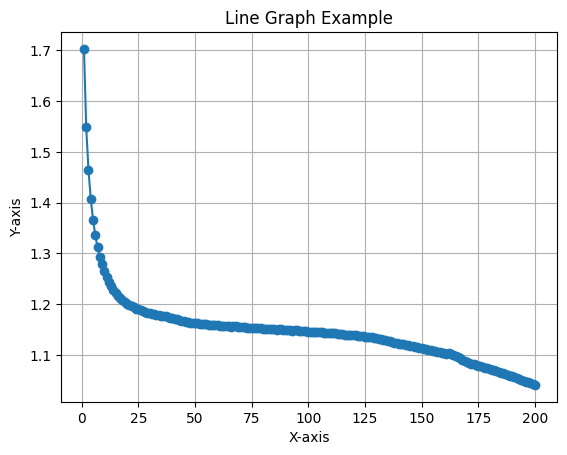

In [21]:
x_values = range(1, len(train_loss_per_epoch) + 1)
plt.plot(x_values, train_loss_per_epoch, marker='o', linestyle='-')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph Example')
plt.grid(True)
plt.show()

In [22]:
outputs = []
hidden_output = x_test.values
outputs.append(hidden_output)
for i in range(0, number_of_hidden_layers + 1):
    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
    hidden_output = relu(hidden_input)
    outputs.append(hidden_output)
probabilities = softmax(outputs[-1])
predicted_labels = np.argmax(probabilities, axis=1)
print(predicted_labels)

[3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 3 3 3 3 3 2 3 3 3 2 3 3 3 3
 2 3 3 3 3 2 3 2 2 3 3 3 3 2 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 2 3 3 3 2 3 3 2 3 2 3 2 2 2 2 3 3 2 3 3 3 2 2 3 3 3 3 3 2 2 2 3 3 2 2 3 5
 2 3 2 2 3 3 2 2 2 3 3 2 2 2 3 3 3 3 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
 2 2 2 3 2 3 3 2 3 3 3 3 3 3 3 2 2 2 3 2 3 3 2 3 3 3 3 2 3 3 3 2 3 3 2 3 3
 3 3 3 2 2 3 3 3 3 2 3 3 2 2 2 3 2 3 3 3 3 2 3 3 3 3 3 2 3 3 2 2 3 2 3 3 3
 3 3 2 2 2 2 2]


In [23]:
accuracy = accuracy_score(y_test, predicted_labels + 3)
print(accuracy)

0.5021834061135371


In [24]:
wandb.init(project="smai_assignment_3_2_1", entity="harshitaggarwal4")

config = wandb.config
config.learning_rate = [0.01, 0.001]
config.batch_size = [32, 64]
config.num_epochs = [200]
config.activation_functions = ['relu', 'tanh', 'sigmoid']
config.optimizers = ['batch', 'mini-batch', 'stochastic gradient descent']

for lr in config.learning_rate:
    for batch_size in config.batch_size:
        for activation_function in config.activation_functions:
            for optimizer in config.optimizers:
                for number_of_epochs in config.num_epochs:
                    weights, biases, train_loss_per_epoch, accuracy_per_epoch = multi_layer_perceptron_classification(x_train, y_train.values, lr, activation_function, optimizer, 2, [6, 6], number_of_epochs, 8)
                    outputs = []
                    hidden_output = x_val.values
                    outputs.append(hidden_output)
                    for i in range(0, number_of_hidden_layers + 1):
                        hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
                        hidden_output = relu(hidden_input)
                        outputs.append(hidden_output)
                    probabilities = softmax(outputs[-1])
                    predicted_labels = np.argmax(probabilities, axis=1)
                    accuracy = accuracy_score(y_val, predicted_labels + 3)
                    for i in range(0, len(accuracy_per_epoch)):
                        wandb.log({
                            "Learning Rate": lr,
                            "Batch Size": batch_size,
                            "Activation_function": activation_function,
                            "Optimizer": optimizer,
                            "Validation Accuracy": accuracy_per_epoch[i],
                            "epoch": i
                        })
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: harshitaggarwal4. Use `wandb login --relogin` to force relogin


0
9.63664065508991
1
9.070214440080795
2
8.583818280926122
3
8.16185760582504
4
7.788917901087887
5
7.453067526002712
6
7.145943749832326
7
6.861825320869241
8
6.59857150570031
9
6.352111297871826
10
6.120227709145599
11
5.901755740652876
12
5.69543839905127
13
5.500708888355177
14
5.316428428148525
15
5.141778897179376
16
4.976025291510472
17
4.818914591495219
18
4.669901757352624
19
4.528489841536419
20
4.394533986501047
21
4.267302897714538
22
4.146762591379176
23
4.032288962424254
24
3.9236192976743567
25
3.820221065768237
26
3.7227841197259535
27
3.630583047017397
28
3.543365070713779
29
3.461059268440827
30
3.382956099613237
31
3.3087185418268366
32
3.238522383833669
33
3.1723708458646147
34
3.1098102575807927
35
3.0504098802740858
36
2.9939641306541236
37
2.940052323569201
38
2.888826671889978
39
2.840240316458876
40
2.7944340671656738
41
2.751157667242531
42
2.710147239454502
43
2.67128642932221
44
2.6345569659632413
45
2.5997276595457186
46
2.5666418195710867
47
2.535278759658

Batch Size,▁▁▁▁▁▁▁▁▁▁██████████▁▁▁▁▁▁▁▁▁▁██████████
Learning Rate,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Accuracy,▄▅▇█▅▇█▄▇▇▅▇▇▃▄▇█▅▇▇▃▆▆▂▄▆█▄▅▇▄▆▇▃▂▇▇▁▆▇
epoch,▃█▇▇▇▇▆▄▃▃▃▂▂▂▇▆▆▆▅▅▂▂▂▂▁▁█▅▅▅▅▄▄▁▁██▇▇▇
Activation_function,sigmoid
Batch Size,64
Learning Rate,0.001
Optimizer,stochastic gradient ...
Validation Accuracy,0.60292
epoch,199


In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

weights, biases, train_loss_per_epoch, accuracy_per_epoch = multi_layer_perceptron_classification(x_train, y_train.values, 0.001, "sigmoid", "stochastic gradient descent", 2, [6, 6], 200, 8)
outputs = []
hidden_output = x_val.values
outputs.append(hidden_output)
for i in range(0, number_of_hidden_layers + 1):
    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
    hidden_output = relu(hidden_input)
    outputs.append(hidden_output)
probabilities = softmax(outputs[-1])
predicted_labels = np.argmax(probabilities, axis=1)
accuracy = accuracy_score(y_val, predicted_labels + 3)
print("Accuracy :", accuracy)

precision = precision_score(y_val, predicted_labels + 3, average='micro')
recall = recall_score(y_val, predicted_labels + 3, average='micro')
f1 = f1_score(y_val, predicted_labels + 3, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0
2.1597561247347565
1
1.7255806289311626
2
1.5205965888368904
3
1.4170703149878991
4
1.3586832122464174
5
1.321271659292478
6
1.2949852215461344
7
1.2749724262570559
8
1.2590775288844058
9
1.2456726744696527
10
1.234167532633063
11
1.2240783688681742
12
1.21511966536291
13
1.2070741549567676
14
1.1998173075720946
15
1.1931341630920047
16
1.1870281832616605
17
1.18138868443853
18
1.1761132793528857
19
1.1712296349597195
20
1.1665748591450356
21
1.162205239842877
22
1.158087581241643
23
1.1541997335079823
24
1.1504345247684604
25
1.146867811388578
26
1.143453282957002
27
1.1402051058284979
28
1.1370148734267316
29
1.1339833068830119
30
1.131054555571055
31
1.1281914919247094
32
1.1254288435670359
33
1.1227676443572752
34
1.1201661679379067
35
1.1176351887666174
36
1.1151764787036824
37
1.1127898884968193
38
1.1104934667937885
39
1.1082206574869562
40
1.1059979451360646
41
1.1037924436690425
42
1.1016949136715848
43
1.099610852360301
44
1.0975910148457484
45
1.095617927148523
46
1.093690

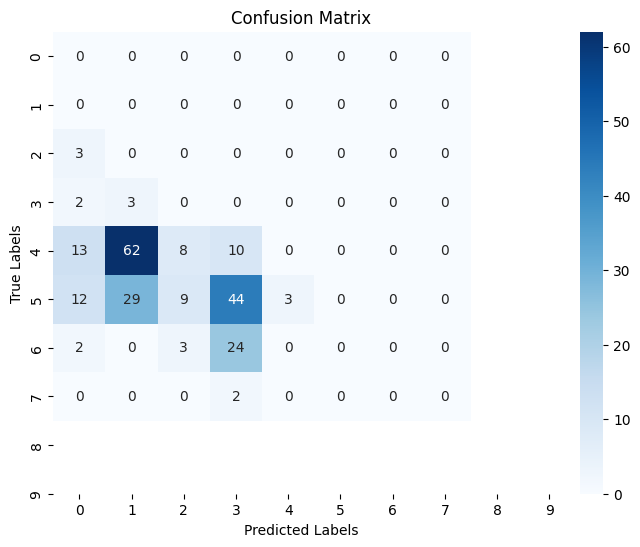

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()